In [10]:
from dwave.system import DWaveSampler, EmbeddingComposite
import networkx as nx
import matplotlib.pyplot as plt
from helpers.draw import draw
from helpers.loader import global_signed_social_network
import dwave_networkx as dnx

In [ ]:
United States of America

In [12]:
sampler = EmbeddingComposite(DWaveSampler())

In [2]:
G = global_signed_social_network()

In [4]:
# Select the Syria subregion 
syria_groups = set()
for v, data in G.nodes(data=True):
    if 'map' not in data:
        continue
    if data['map'] in {'Syria', 'Aleppo'}:
        syria_groups.add(v)
S = G.subgraph(syria_groups)

# Filter by year
year = 2013
filtered_edges = ((u, v) for u, v, a in S.edges(data=True) if a['event_year'] <= year)
S = S.edge_subgraph(filtered_edges)

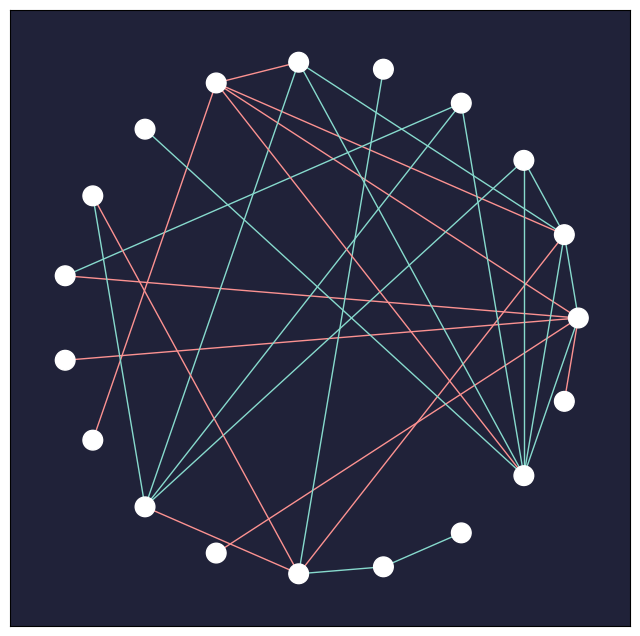

{1: array([ 1.00000000e+00, -1.25483465e-08]),
 523: array([0.94581723, 0.32469945]),
 525: array([0.78914052, 0.61421269]),
 653: array([0.54694813, 0.83716649]),
 143: array([0.24548549, 0.96940029]),
 527: array([-0.08257935,  0.99658448]),
 655: array([-0.40169542,  0.91577334]),
 657: array([-0.67728159,  0.73572391]),
 529: array([-0.87947378,  0.47594741]),
 533: array([-0.98636136,  0.16459461]),
 661: array([-0.98636136, -0.16459458]),
 535: array([-0.87947378, -0.47594737]),
 537: array([-0.67728165, -0.73572388]),
 671: array([-0.40169528, -0.91577342]),
 81: array([-0.08257941, -0.9965845 ]),
 361: array([ 0.24548567, -0.96940026]),
 619: array([ 0.54694807, -0.83716652]),
 493: array([ 0.78914064, -0.6142126 ]),
 629: array([ 0.94581723, -0.32469954])}

In [5]:
draw(S)

In [7]:
print(list(S.nodes(data=True))[:2])
print(list(S.edges(data=True))[:2])

[(1, {'map': 'Aleppo'}), (523, {'map': 'Aleppo'})]
[(1, 661, {'sign': -1, 'event_id': '1865', 'event_type': 'riv', 'event_year': 2011, 'event_description': 'Jaysh al Sanadeed began targeting the Islamic State.'}), (1, 523, {'sign': 1, 'event_id': '1821', 'event_type': 'all', 'event_year': 2013, 'event_description': 'Ahrar al-Sham and the Islamic State coordinated an attack on Alawite villages in the Latakia governorate that killed 190 civilians.'})]


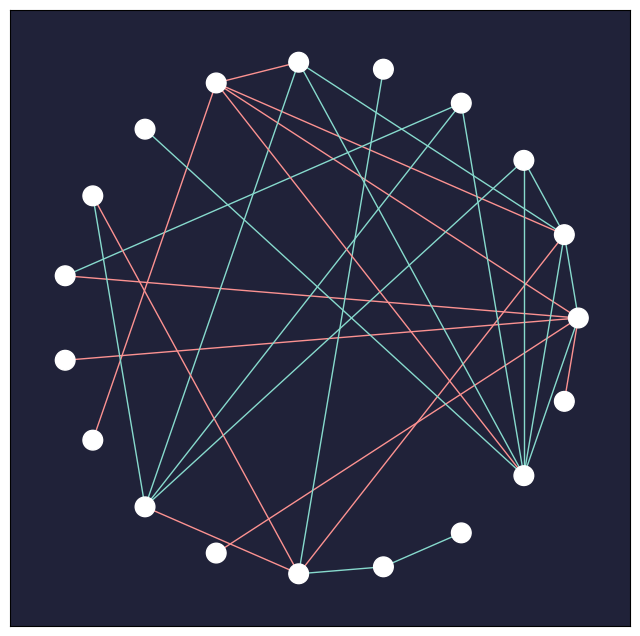

In [8]:
position = draw(S)

In [13]:
imbalance, bicoloring = dnx.structural_imbalance(S, sampler)

for edge in S.edges:
    S.edges[edge]['frustrated'] = edge in imbalance
for node in S.nodes:
    S.nodes[node]['color'] = bicoloring[node]

In [14]:
print(list(S.nodes(data=True))[:2])
print(list(S.edges(data=True))[:2])

[(1, {'map': 'Aleppo', 'color': 1}), (523, {'map': 'Aleppo', 'color': 1})]
[(1, 661, {'sign': -1, 'event_id': '1865', 'event_type': 'riv', 'event_year': 2011, 'event_description': 'Jaysh al Sanadeed began targeting the Islamic State.', 'frustrated': False}), (1, 523, {'sign': 1, 'event_id': '1821', 'event_type': 'all', 'event_year': 2013, 'event_description': 'Ahrar al-Sham and the Islamic State coordinated an attack on Alawite villages in the Latakia governorate that killed 190 civilians.', 'frustrated': False})]


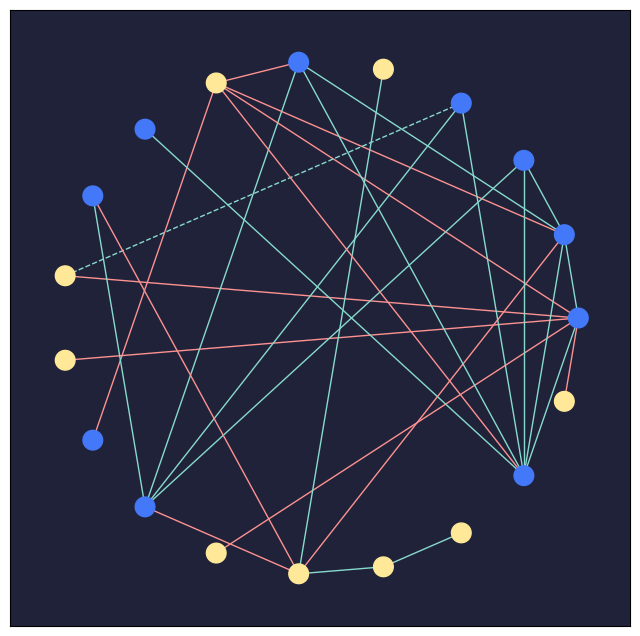

In [15]:
draw(S, position);

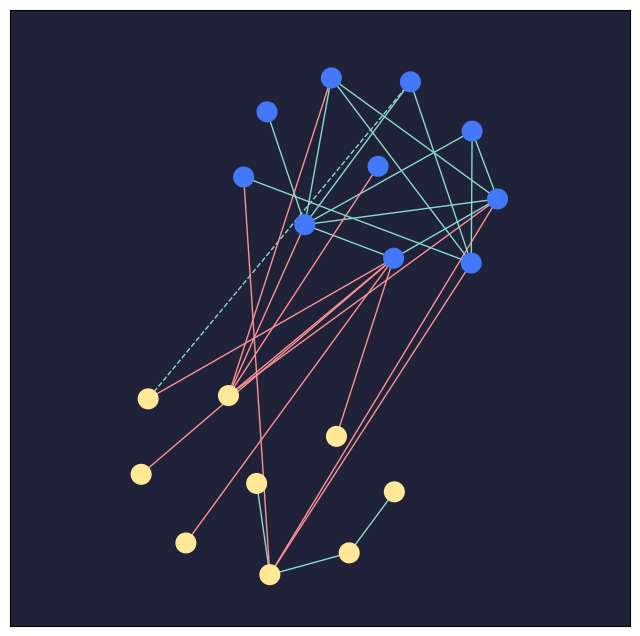

In [16]:
draw(S);

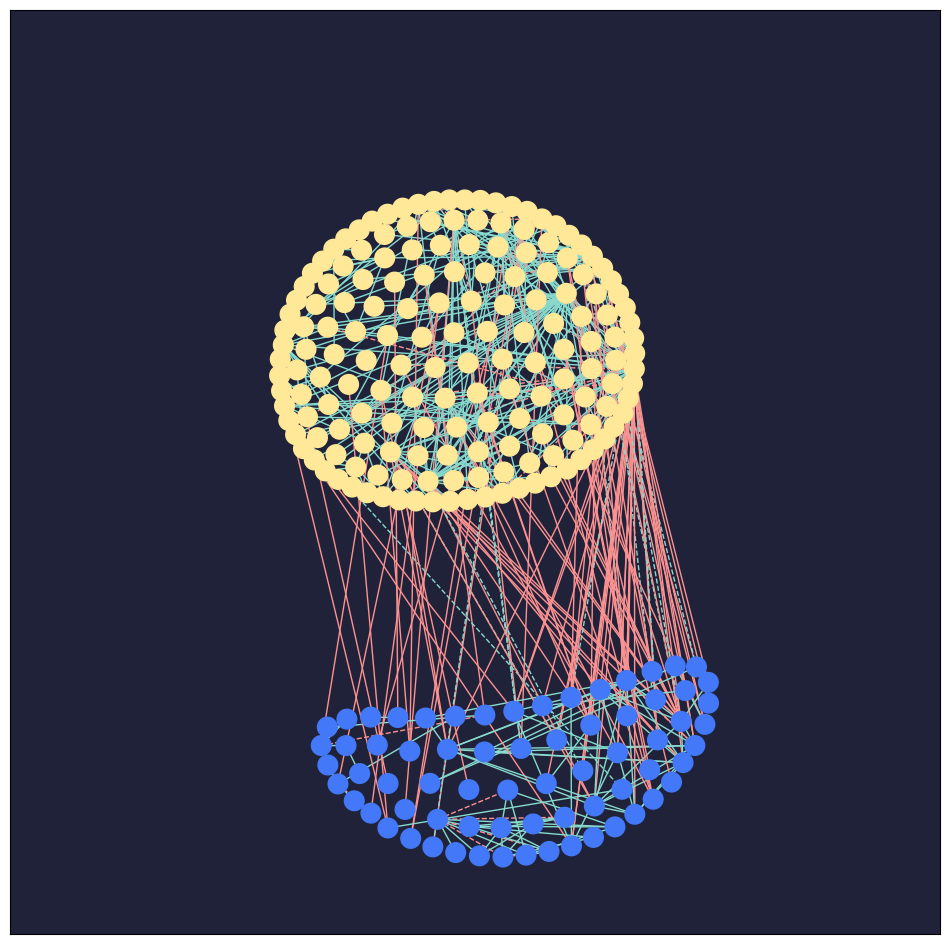

In [17]:
imbalance, bicoloring = dnx.structural_imbalance(G, sampler)

for edge in G.edges:
    G.edges[edge]['frustrated'] = edge in imbalance
for node in G.nodes:
    G.nodes[node]['color'] = bicoloring[node]
draw(G);